In [1]:
%load_ext autoreload

In [6]:
%autoreload 2

import os
import io
import sys
import ast
sys.path.append(os.path.join(os.getcwd(), '..','..'))
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from premier_league_models.processing.preprocess import generate_cnn_data, split_preprocess_cnn_data, preprocess_cnn_data
from premier_league_models.rnn.model import build_train_rnn, full_rnn_pipeline
from premier_league_models.processing.evaluate import gridsearch_analysis
import random
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import torch


from config import STANDARD_CAT_FEATURES, STANDARD_NUM_FEATURES, NUM_FEATURES_DICT


# Run Full Training

======= Generating CNN Data for Season: ['2020-21', '2021-22'], Position: GK =======
Dropping Players with Avg. Playtime < 1e-06...

Total players of type GK = 163.
82 players dropped due to low average playtime.
Generated windowed dataframe for CNN of shape: (2502, 7).
Generated combined features dataframe for preprocessing of shape: (2988, 11).

========== EDA ==========
========== Done Generating CNN Data ==========

========== Splitting CNN Data ==========

=== Stratifying Split by : Stdev ===
Shape of windowed_df: (2502, 7)
Shape of a given window (prior to preprocessing): (6, 11)
stdev Distribution of Players:

========== Preprocessing CNN Data ==========

Mean of Standard Scaler:
[ 1.91043017e+00  1.20188568e+00  1.49675899e-01  7.44843842e-01
  9.65822039e+00 -5.24454920e-02  0.00000000e+00  1.76782557e-03
  2.06246317e-02  1.17855038e-03]

Standard Deviation of Standard Scaler:
[ 2.71102698  1.51262882  0.35675345  1.18885945 10.44252919  1.38395817
  1.          0.04200834  0

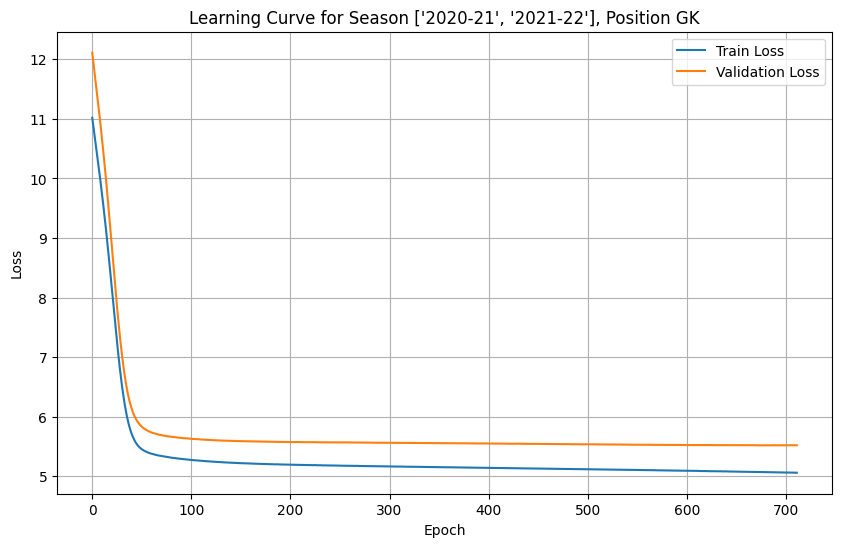

X input shape:
(6, 10)
d input shape:
(1,)


c:\Users\Dean\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\onnx\symbolic_opset9.py:4545: UserWarning: Exporting a model to ONNX with a batch_size other than 1, with a variable length with RNN_TANH can cause an error when running the ONNX model with a different batch size. Make sure to save the model with a batch size of 1, or define the initial states (h0/c0) as inputs of the model. 
  warnings.warn(


(rnnModel(
   (flatten): Flatten(start_dim=1, end_dim=-1)
   (rnn): RNN(10, 64, batch_first=True, bidirectional=True)
   (attention): TemporalAttention(
     (W): Linear(in_features=128, out_features=64, bias=False)
     (v): Linear(in_features=64, out_features=1, bias=False)
   )
   (linear_relu_stack): Sequential(
     (0): Linear(in_features=129, out_features=1, bias=True)
   )
 ),
 {'train_mse': 5.057281017303467,
  'train_mae': 1.506782429136813,
  'val_mse': 5.519773483276367,
  'val_mae': 1.5656941559575839,
  'test_mse': 3.6489906311035156,
  'test_mae': 1.183557855222697,
  'spear_corr': 0.7124045173193783})

In [12]:
SEED = 444

random.seed(SEED)
torch.manual_seed(SEED)
np.random.seed(SEED)

DATA_DIR = os.path.join(os.getcwd(), '..', 'data', 'clean_data')

full_rnn_pipeline(DATA_DIR,
                season = ['2020-21', '2021-22'], 
                position = 'GK', 
                window_size=6,
                num_filters=64,
                num_dense=64,
                bidirectional=True,
                temporal_attention=True,
                batch_size = 32,
                epochs = 2000,  
                drop_low_playtime = True,
                low_playtime_cutoff = 1e-6,
                num_features = ['total_points', 'ict_index', 'clean_sheets', 'goals_conceded', 'bps', 'matchup_difficulty', 'goals_scored', 'assists', 'yellow_cards', 'red_cards'],
                cat_features = STANDARD_CAT_FEATURES, 
                stratify_by = 'stdev', 
                conv_activation = 'relu',
                dense_activation = 'relu',
                optimizer='adam',
                learning_rate= 0.00001,  
                loss = 'mse',
                metrics = ['mae'],
                verbose = True,
                regularization = 0.01, 
                early_stopping = True, 
                tolerance = 1e-5, # only used if early stopping is turned on, threshold to define low val loss decrease
                patience = 20,   # num of iterations before early stopping bc of low val loss decrease
                plot = True, 
                draw_model = False,
                standardize= True,)

# GridSearch for Best Model

In [ ]:
from premier_league_models.rnn.experiment import gridsearch_rnn

gridsearch_rnn(experiment_name = "rnn_eval_big", verbose = True)

#PERFORMING VIA COMMAND LINE SCRIPT NOW FOR EFFICIENCY